<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/Jeffrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/DODAS-TS/boto3sts
!pip install 'https://github.com/CYGNUS-RD/middleware/blob/master/midas/midaslib.tar.gz?raw=true'
!pip install git+https://github.com/CYGNUS-RD/cygno.git -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/DODAS-TS/boto3sts to /tmp/pip-req-build-00achjti
  Running command git clone -q https://github.com/DODAS-TS/boto3sts /tmp/pip-req-build-00achjti
  Using cached boto3-1.24.18-py3-none-any.whl (132 kB)
     |████████████████████████████████| 8.9 MB 5.1 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 138 kB 53.4 MB/s 
     |████████████████████████████████| 856 kB 38.8 MB/s 
     |████████████████████████████████| 127 kB 52.4 MB/s 
  Created wheel for boto3sts: filename=boto3sts-0.0.8-py3-none-any.whl size=4677 sha256=99d40387cc3b1fbf62879ec96098068d248d07b7e9f95acf40556d5d1f2bc3ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-bzld8z9x/wheels/d6/0e/a8/204df23fe4a288550d10cf9cf744ab143484e177e12982e424
Successfully built boto3sts
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.

https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/STD/run01402.mid.gz
https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/STD/run01402.mid.gz
Saw a special event
Event # 0 of type ID 3 contains banks DMND, MSRD, CRNT, STAT, TPTR
Received event with timestamp 1655210605 containing banks DMND, MSRD, CRNT, STAT, TPTR
2022-06-14 12:43:25, banks DMND, MSRD, CRNT, STAT, TPTR
Event # 0 of type ID 4 contains banks DMND, MSRD, CRNT, STAT, TPTR
Received event with timestamp 1655210605 containing banks DMND, MSRD, CRNT, STAT, TPTR
2022-06-14 12:43:25, banks DMND, MSRD, CRNT, STAT, TPTR
Event # 0 of type ID 6 contains banks DMND, MSRD
Received event with timestamp 1655210605 containing banks DMND, MSRD
2022-06-14 12:43:25, banks DMND, MSRD
Event # 0 of type ID 1 contains banks CAM0
Received event with timestamp 1655210606 containing banks CAM0
2022-06-14 12:43:26, banks CAM0


file /tmp/run01402.mid.gz cached

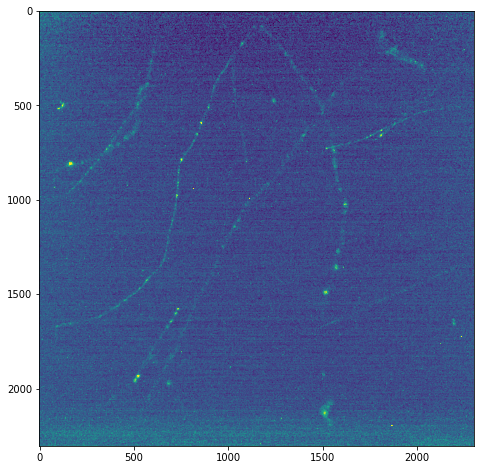

Event # 1 of type ID 1 contains banks CAM0
Received event with timestamp 1655210607 containing banks CAM0
2022-06-14 12:43:27, banks CAM0


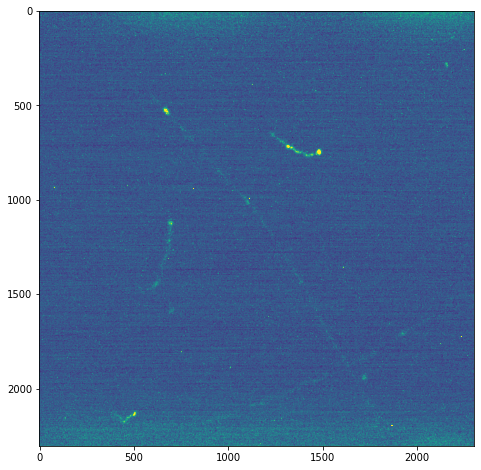

Event # 2 of type ID 1 contains banks CAM0
Received event with timestamp 1655210608 containing banks CAM0
2022-06-14 12:43:28, banks CAM0


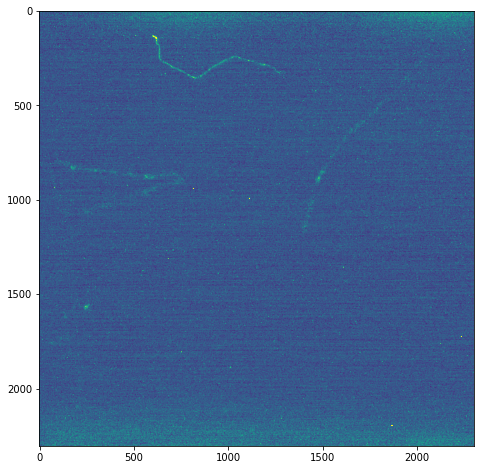

Event # 3 of type ID 1 contains banks CAM0
Received event with timestamp 1655210608 containing banks CAM0
2022-06-14 12:43:28, banks CAM0


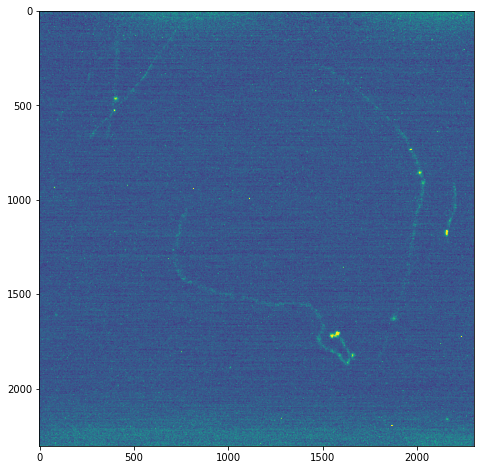

Event # 4 of type ID 1 contains banks CAM0
Received event with timestamp 1655210609 containing banks CAM0
2022-06-14 12:43:29, banks CAM0


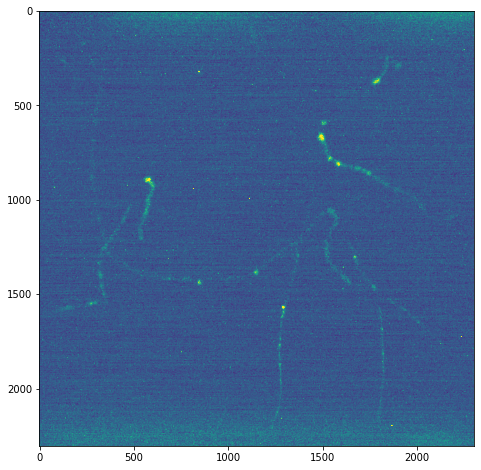

Event # 5 of type ID 1 contains banks CAM0
Received event with timestamp 1655210609 containing banks CAM0
2022-06-14 12:43:29, banks CAM0


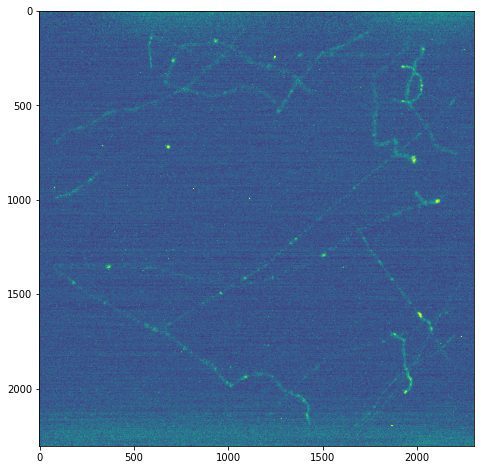

Event # 6 of type ID 1 contains banks CAM0
Received event with timestamp 1655210611 containing banks CAM0
2022-06-14 12:43:31, banks CAM0


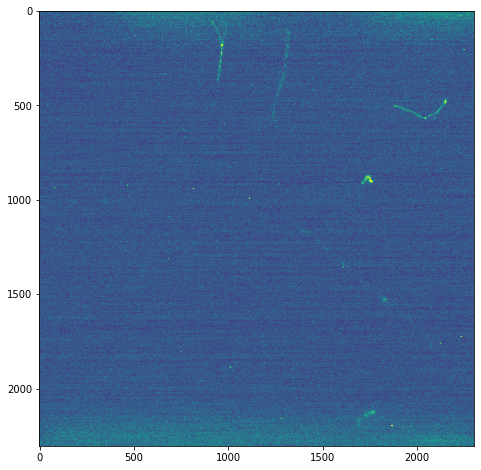

Event # 7 of type ID 1 contains banks CAM0
Received event with timestamp 1655210612 containing banks CAM0
2022-06-14 12:43:32, banks CAM0


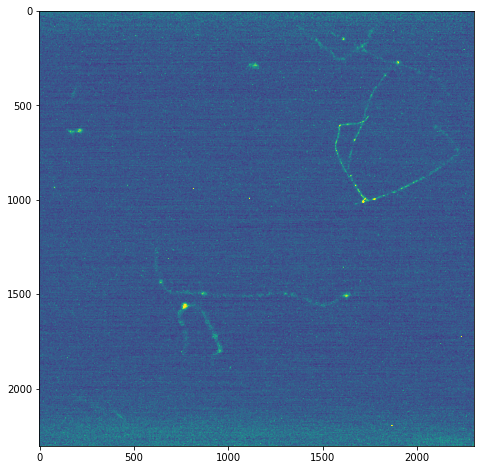

Event # 8 of type ID 1 contains banks CAM0
Received event with timestamp 1655210614 containing banks CAM0
2022-06-14 12:43:34, banks CAM0


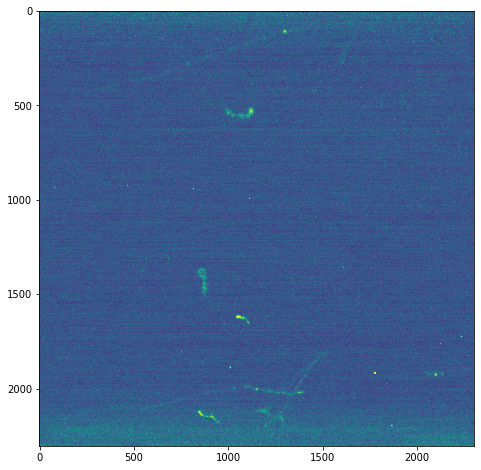

Event # 9 of type ID 1 contains banks CAM0
Received event with timestamp 1655210615 containing banks CAM0
2022-06-14 12:43:35, banks CAM0


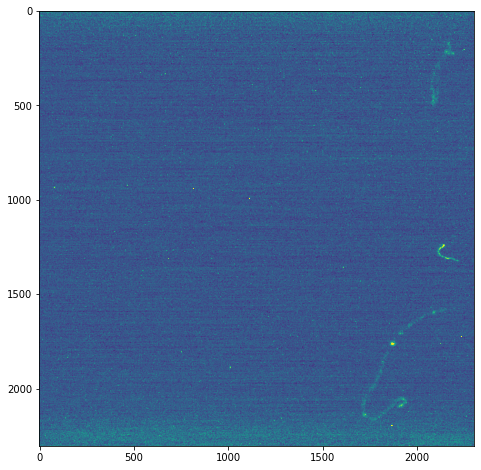

Event # 10 of type ID 1 contains banks CAM0
Received event with timestamp 1655210617 containing banks CAM0
2022-06-14 12:43:37, banks CAM0


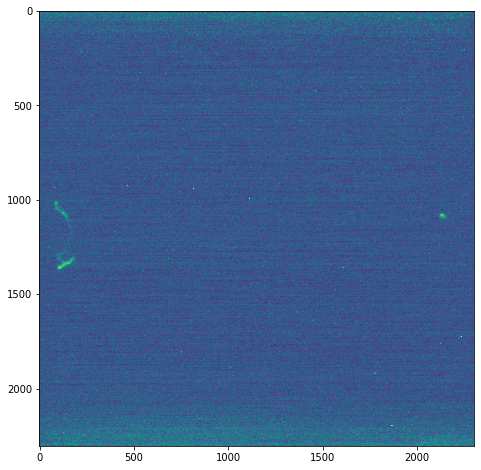

Event # 11 of type ID 1 contains banks CAM0
Received event with timestamp 1655210617 containing banks CAM0
2022-06-14 12:43:37, banks CAM0


KeyboardInterrupt: ignored

In [4]:
import midas.file_reader
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import cygno as cy

mfile = cy.open_mid(run=1402, path='/tmp/', cloud=True, tag='STD', verbose=True)

for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
    print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
    print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))

    for bank_name, bank in event.banks.items():
        if bank_name=='DGH0': # PMTs wavform 
            header = cy.daq_dgz2header(bank)
            print (header)
            waveform = cy.daq_dgz2array(event.banks['DIG0'], header)
        if bank_name=='CAM0': # CAM image
            image, _, _ = cy.daq_cam2array(bank)
            plt.figure(figsize=(8,8))
            plt.imshow(image, vmin=95, vmax=115)
            plt.show()
        if bank_name=='INPT': # SLOW channels array
            slow = cy.daq_slow2array(bank)